In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.linalg import eig

In [41]:
data = np.array([[3,4], [2,8], [6,9], [10,12]])

In [42]:
data = pd.DataFrame(data, columns=["col1", "col2"])

In [43]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


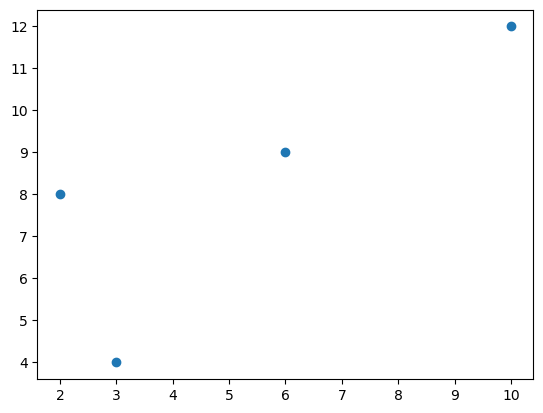

In [44]:
plt.scatter(data['col1'], data['col2'])

1. Standardizartion
2. Cov-matrix
3. Eigen value and eig vector
4. Find the principal component

In [45]:
# mean of the data

mean_by_col = np.mean(data, axis=0)

In [17]:
# Standard deviation

std_by_col = np.std(data, axis=0)

In [19]:
scaled_by_mean = data - mean_by_col

In [20]:
#standardization

scaled_data = scaled_by_mean/std_by_col

In [21]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [22]:
# Using library

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaler.fit_transform(data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [26]:
# Covariance matrix

cov_mat = np.cov(scaled_data.T)

step-3 eig value and eigen vector

In [28]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [29]:
eig_val

array([2.40938985, 0.25727682])

In [30]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [31]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [33]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA()

In [36]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [37]:
pd.DataFrame(data=pca.fit_transform(scaled_data), columns=['pc1', 'pc2'])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [38]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [39]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])